In [1]:
articles = [
    {
        "headline": "Economic Growth Continues Amid Global Uncertainty",
        "topic": "Business",
    },
    {"headline": "Interest rates fall to historic lows", "topic": "Business"},
    {
        "headline": "Scientists Make Breakthrough Discovery in Renewable Energy",
        "topic": "Science",
    },
    {"headline": "India Successfully Lands Near Moon's South Pole", "topic": "Science"},
    {"headline": "New Particle Discovered at CERN", "topic": "Science"},
    {
        "headline": "Tech Company Launches Innovative Product to Improve Online Accessibility",
        "topic": "Tech",
    },
    {"headline": "Tech Giant Buys 49% Stake In AI Startup", "topic": "Tech"},
    {"headline": "New Social Media Platform Has Everyone Talking!", "topic": "Tech"},
    {
        "headline": "The Blues get promoted on the final day of the season!",
        "topic": "Sport",
    },
    {"headline": "1.5 Billion Tune-in to the World Cup Final", "topic": "Sport"},
]

In [7]:
# We will generate embeddings
from sentence_transformers import SentenceTransformer
headlines = [article['headline'] for article in articles]
model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(headlines)


In [20]:
# Dimensionality Reduction
from sklearn.manifold import TSNE
import numpy as np
tsne = TSNE(n_components=2, perplexity=5)
print(len(embeddings[0]))
embeddings_2d = tsne.fit_transform(np.array(embeddings))

for article, emb in zip(articles, embeddings_2d):
    article['embedding'] = emb

384


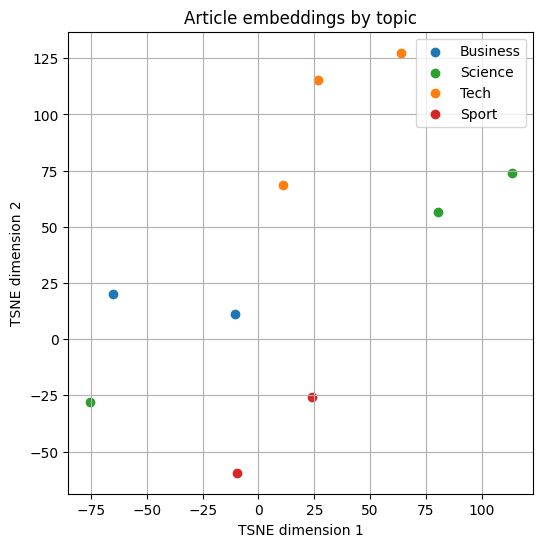

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# assume embeddings_2d is shape (len(articles), 2)
embeddings_2d = np.array(embeddings_2d)

# simple color map per topic
topic_to_color = {
    "Business": "tab:blue",
    "Science": "tab:green",
    "Tech": "tab:orange",
    "Sport": "tab:red",
}

plt.figure(figsize=(6, 6))

# plot one scatter per topic (so legend works nicely)
for topic in topic_to_color:
    idxs = [i for i, a in enumerate(articles) if a["topic"] == topic]
    xs = embeddings_2d[idxs, 0]
    ys = embeddings_2d[idxs, 1]
    plt.scatter(xs, ys, c=topic_to_color[topic], label=topic)

plt.xlabel("TSNE dimension 1")
plt.ylabel("TSNE dimension 2")
plt.title("Article embeddings by topic")
plt.legend()
plt.grid(True)
plt.show()
